In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import auth
import gspread
from google.auth import default

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('dl_ex1').sheet1
data = worksheet.get_all_values()

In [ ]:
dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'Input':'float'})
dataset1 = dataset1.astype({'Output':'float'})

In [ ]:
dataset1.head()


,Input,Output
0,1.0,80.0
1,2.0,95.0
2,3.0,90.0
3,4.0,85.0
4,5.0,75.0


In [ ]:
X = dataset1[['Input']].values
y = dataset1[['Output']].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state=33)

In [ ]:
Scaler = MinMaxScaler()

In [ ]:
Scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train1 = Scaler.transform(X_train)


In [ ]:
ai_brain = Sequential([
    Dense(8,activation = 'relu'),
    Dense(10,activation = 'relu'),
    Dense(1)
    ])

In [ ]:
ai_brain.compile(optimizer='rmsprop',loss='mse')

In [ ]:
ai_brain.fit(X_train1,y=y_train,epochs=2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 6770.6089
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 6767.6602
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 6765.5288
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 6763.7695
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 6762.1694
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - loss: 6760.6626
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 6759.2163
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 6757.8745
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 6756.6187
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 6755.4478
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - loss: 6754.3203
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 6753.2773
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 6752.3550
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 6751.4468
Epoch 15/2000
1/1 ━━

<Axes: >

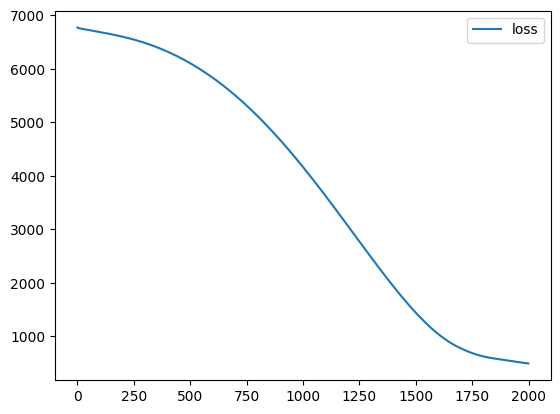

In [ ]:
loss_df = pd.DataFrame(ai_brain.history.history)
loss_df.plot()

In [ ]:
X_test1 = Scaler.transform(X_test)

In [ ]:
ai_brain.evaluate(X_test1,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - loss: 211.1079


211.10794067382812

In [ ]:
X_n1 = [[4]]

In [ ]:
X_n1_1 = Scaler.transform(X_n1)

In [ ]:
ai_brain.predict(X_n1_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([[75.90639]], dtype=float32)